In [1]:
import matplotlib 
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
l1,l2,h1,h2,d1,d2,k_theta,k_phi,k_L, x1,x2,x3 = sm.symbols("l1,l2,h1,h2,d1,d2,k_theta,k_phi,k_L, x1,x2,x3")

In [27]:
L1 = sm.sqrt(l1**2 + h1**2)
th0 = sm.atan(h1/l1)
th = sm.atan((h1-d1)/l1)

d2 = 2*(sm.sqrt(l1**2+h1**2-(h1-d1)**2)-l1)
ph0 = sm.atan(h2/l2)
ph = sm.atan((h2-d2)/l2)

d3 = sm.sqrt(l2**2+h2**2-(h2-d2)**2)-l2

l3_0 = sm.sqrt(l2**2+h2**2);
l3= sm.sqrt(l2**2+(h2-d2)**2)

PE1 = 2*k_theta*(th0-th)**2;
PE2 = 1/2*k_phi*(ph0-ph)**2;
PE3 = 1/2*k_L*(2*d3)**2

PE = PE1+PE2+PE3

repl = {l1:10,
        l2:0.4,
        h1:4,
        h2:0.8,
        k_theta:1,
        k_phi:1,
        k_L:1,
        d1:0}

c = sm.cos
s = sm.sin

F = PE.diff(d1)
xs = [0,L1*c(th),2*L1*c(th),2*l1+h2,2*L1*c(th),2*l1+h2]
ys = [0,h1-d1,0,l2+d3,0,-l2-d3]




#convert F and PE to numpy functions with the parameters as input
F_l = sm.lambdify([l1,l2,h1,h2,k_theta,k_phi,k_L,d1],F)
PE_l = sm.lambdify([l1,l2,h1,h2,k_theta,k_phi,k_L,d1],PE)
PE1_l = sm.lambdify([l1,l2,h1,h2,k_theta,k_phi,k_L,d1],PE1)
PE2_l = sm.lambdify([l1,l2,h1,h2,k_theta,k_phi,k_L,d1],PE2)
PE3_l = sm.lambdify([l1,l2,h1,h2,k_theta,k_phi,k_L,d1],PE3)
xs_l = sm.lambdify([l1,l2,h1,h2,k_theta,k_phi,k_L,d1],xs)
ys_l = sm.lambdify([l1,l2,h1,h2,k_theta,k_phi,k_L,d1],ys)

sm.simplify(PE3)

2.0*k_L*(l2 - sqrt(h2**2 + l2**2 - (h2 + 2*l1 - 2*sqrt(h1**2 + l1**2 - (d1 - h1)**2))**2))**2

In [32]:
#parameters
repl = {'l1':1.4,
        'l2':0.4,
        'h1':0.5,
        'h2':0.1,
        'k_theta':0.3,
        'k_phi':6,
        'k_L':10000,
        'd1':0.1}


def evaluate(l1=10,l2=0.4,h1=4,h2=0.8,k_theta=1,k_phi=1,k_L=1,d1 =0):
    #calls the lambdified functions with the parameters as input
    F = F_l(l1,l2,h1,h2,k_theta,k_phi,k_L,d1)
    PEl = PE_l(l1,l2,h1,h2,k_theta,k_phi,k_L,d1)
    PE1l = PE1_l(l1,l2,h1,h2,k_theta,k_phi,k_L,d1)
    PE2l = PE2_l(l1,l2,h1,h2,k_theta,k_phi,k_L,d1)
    PE3l = PE3_l(l1,l2,h1,h2,k_theta,k_phi,k_L,d1)
    xs = xs_l(l1,l2,h1,h2,k_theta,k_phi,k_L,d1)
    ys = ys_l(l1,l2,h1,h2,k_theta,k_phi,k_L,d1)


    return {'F':F,'PE':PEl,'PE1':PE1l,'PE2':PE2l,'PE3':PE3l,'x':xs,'y':ys}


plt.close()

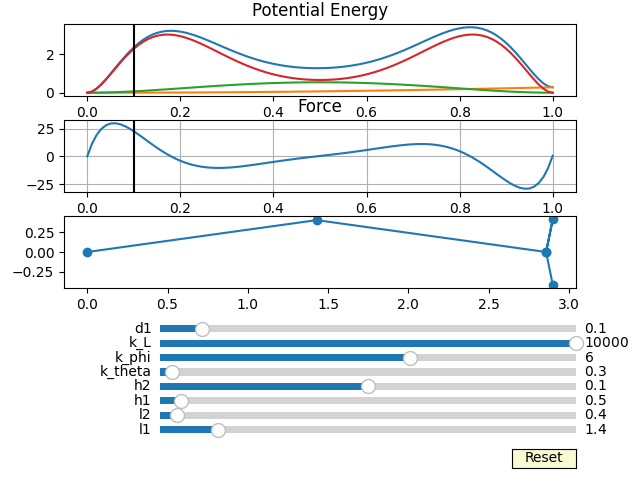

In [33]:
#plot setup with three stacked subplots
from matplotlib.widgets import Slider, Button

fig= plt.Figure(figsize=(8,8))
#add axes
ax1 = plt.axes([0.1,0.8,0.8,0.15])
ax2 = plt.axes([0.1,0.6,0.8,0.15])
ax3 = plt.axes([0.1,0.4,0.8,0.15])

ax1.set_title("Potential Energy")
ax2.set_title("Force")
ax2.grid('on')

init = evaluate(**repl)
#plot the mechanism
mechanism = ax3.plot(init['x'],init['y'],'-o')

#plot the potential energy
d1s = np.linspace(0,1,100)
#copy the dictionary and add the d1 values
repl2 = repl.copy()
repl2['d1'] = d1s
init2 = evaluate(**repl2)

PE_pl = ax1.plot(d1s,init2['PE'])

#plot the force
F_pl = ax2.plot(d1s,init2['F'])

#plot the potential energy components on the same plot
PE1_pl=ax1.plot(d1s,init2['PE1'])
PE2_pl=ax1.plot(d1s,init2['PE2'])
PE3_pl=ax1.plot(d1s,init2['PE3'])

#add a vertical line to the plots for the current d1
vline1 = ax1.axvline(repl['d1'],color='k')
vline2 = ax2.axvline(repl['d1'],color='k')

#define the sliders
axcolor = 'lightgoldenrodyellow'
axl1 = plt.axes([0.25, 0.09, 0.65, 0.03], facecolor=axcolor)
axl2 = plt.axes([0.25, 0.12, 0.65, 0.03], facecolor=axcolor)

axh1 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axh2 = plt.axes([0.25, 0.18, 0.65, 0.03], facecolor=axcolor)

axk_theta = plt.axes([0.25, 0.21, 0.65, 0.03], facecolor=axcolor)
axk_phi = plt.axes([0.25, 0.24, 0.65, 0.03], facecolor=axcolor)
axk_L = plt.axes([0.25, 0.27, 0.65, 0.03], facecolor=axcolor)

axd1 = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)


# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

sl1 = Slider(axl1, 'l1', 0, 10, valinit=repl['l1'])
sl2 = Slider(axl2, 'l2', 0, 10, valinit=repl['l2'])

sh1 = Slider(axh1, 'h1', 0, 10, valinit=repl['h1'])
sh2 = Slider(axh2, 'h2', 0, 0.2, valinit=repl['h2'])

sk_theta = Slider(axk_theta, 'k_theta', 0, 10, valinit=repl['k_theta'])
sk_phi = Slider(axk_phi, 'k_phi', 0, 10, valinit=repl['k_phi'])
sk_L = Slider(axk_L, 'k_L', 0, 10000, valinit=repl['k_L'])

sd1 = Slider(axd1, 'd1', 0, 1, valinit=repl['d1'])


def update(val):
    #update the parameters
    repl['l1'] = sl1.val
    repl['l2'] = sl2.val
    repl['h1'] = sh1.val
    repl['h2'] = sh2.val
    repl['k_theta'] = sk_theta.val
    repl['k_phi'] = sk_phi.val
    repl['k_L'] = sk_L.val
    repl['d1'] = sd1.val
    
    #evaluate the new mechanism
    new = evaluate(**repl)
    
    
    #update the mechanism plot
    mechanism[0].set_data(new['x'],new['y'])
    #update the vertical line
    vline1.set_xdata(repl['d1'])
    vline2.set_xdata(repl['d1'])

    #replace d1 with array to plot the potential energy
    repl2 = repl.copy()
    repl2['d1'] = d1s
    new2 = evaluate(**repl2)
    #update the potential energy plot
    PE_pl[0].set_ydata(new2['PE'])
    PE1_pl[0].set_ydata(new2['PE1'])
    PE2_pl[0].set_ydata(new2['PE2'])
    PE3_pl[0].set_ydata(new2['PE3'])
    #update the force plot
    F_pl[0].set_ydata(new2['F'])
    #update the plots
    fig.canvas.draw_idle()

# register the update function with each slider

sl1.on_changed(update)
sl2.on_changed(update)
sh1.on_changed(update)
sh2.on_changed(update)
sk_theta.on_changed(update)
sk_phi.on_changed(update)
sk_L.on_changed(update)
sd1.on_changed(update)





def reset(event):
    sl1.reset()
    sl2.reset()
    sh1.reset()
    sh2.reset()
    sk_theta.reset()
    sk_phi.reset()
    sk_L.reset()
    sd1.reset()
button.on_clicked(reset)
PE_pl[0].get_ydata()
plt.show()